In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import patches

sns.set_context("talk")

In [2]:
threshold_text = "Win Threshold"
colors = {
    "Orange": ["#e6550d", "#fdae6b", "#fee6ce",],
    "Blue": ["#3182bd", "#9ecae1", "#deebf7",],
    "Green": ["#31a354", "#a1d99b", "#e5f5e0",],
    "Purple": ["#756bb1", "#bcbddc", "#efedf5",],
    "Beige": ["#e1b36a",], # ONLY USED FOR ARROWS/TEXT
}

def plot_election(candidates, ax):
    names, votes = zip(*candidates)
    name_split = [(name[:-1], name[-1]) for name in names]
    hues = [colors[color][int(idx)-1] 
            for color, idx in name_split]

    ax = sns.histplot(x=names, weights=votes, hue=names, palette=hues, shrink=0.8, legend=False, ax=ax)
    ax.set(ylabel="Votes")
    ax.tick_params(bottom=False)
    sns.despine(ax=ax)

def plot_lines(lines, ax):
    for level, text in lines:
        ax.axhline(level, ls="dashed", color="black")
        text_x = ax.get_xlim()[1]
        ax.text(text_x, level*1.01, text, va="bottom", ha="right", size=12)


DEFAULT_ARROW_TEXT = "Allocate excess votes\nto next-ranked choice"
def plot_arrow(fig, posA, posB, color="Blue", txt_pos=None, angleA=0, arrow_text=DEFAULT_ARROW_TEXT):
    arrow = patches.FancyArrowPatch(posA=posA, posB=posB, 
                                    color=colors[color][0],  
                                    arrowstyle="->, head_width=5, head_length=10",
                                    linewidth=2,
                                    transform=fig.transFigure)
    arrow.set_connectionstyle("angle3", angleA=angleA, angleB=-45)
    fig.patches.append(arrow)

    if txt_pos:
        fig.text(*txt_pos, arrow_text, color=colors[color][0], size=12)

def make_plot(cands0, lines0, cands1=None, lines1=None, **kwargs):
    if cands1:
        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)
    else:
        fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

    plot_election(cands0, ax0)
    plot_lines(lines0, ax0)

    if cands1:
        plot_election(cands1, ax1)
        plot_lines(lines1, ax1)
    
    if len(kwargs):
        plot_arrow(**kwargs, fig=fig)


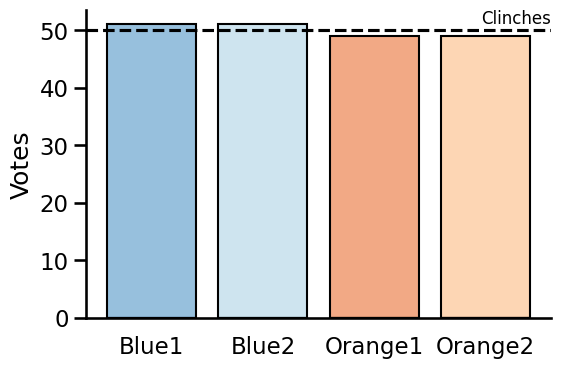

In [3]:
candidates = [("Blue1", 51), ("Blue2", 51), ("Orange1", 49), ("Orange2", 49)]
lines = [(50, "Clinches"),]
make_plot(candidates, lines)

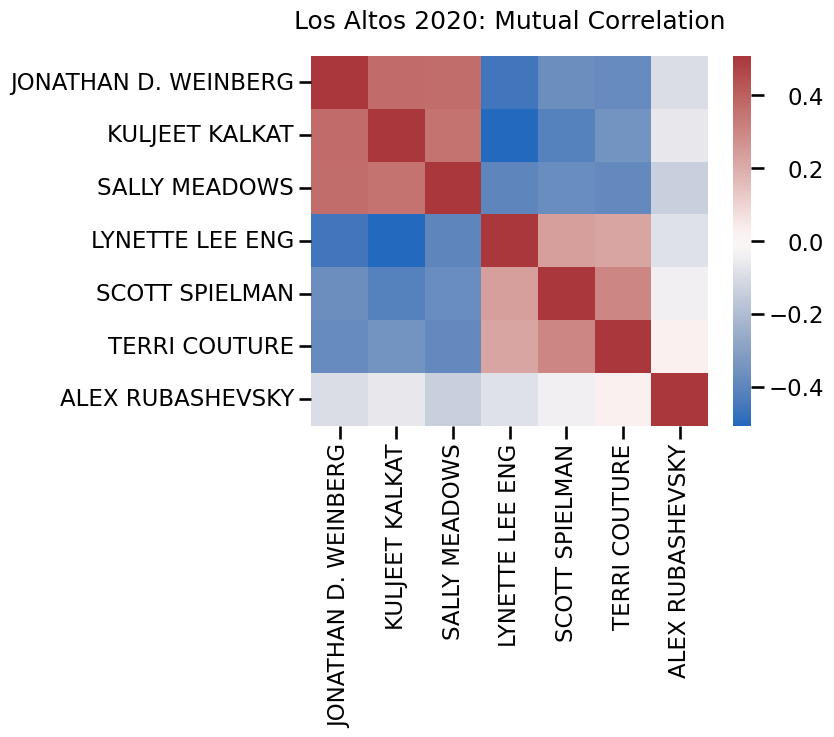

In [4]:
corr = pd.read_csv("los_altos_corr_2020.csv", index_col=0)
mask = np.eye(corr.shape[0], dtype=np.bool_)
limit = np.abs(corr.values[~mask]).max()
ax = sns.heatmap(corr, vmin=-limit, vmax=limit, cmap="vlag")
ax.set(xlabel="", ylabel="")
ax.set_title("Los Altos 2020: Mutual Correlation", pad=20)
for label in ax.collections[0].colorbar.ax.get_yticklabels():
    label.set_horizontalalignment('right')
    label.set_x(4)

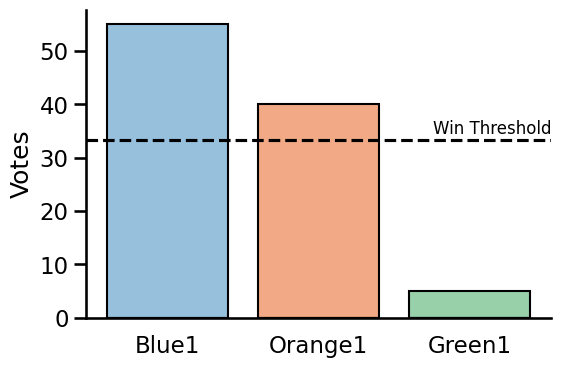

In [5]:
candidates = [("Blue1", 55), ("Orange1", 40), ("Green1", 5)]
lines = [(33.33, threshold_text),]
make_plot(candidates, lines)

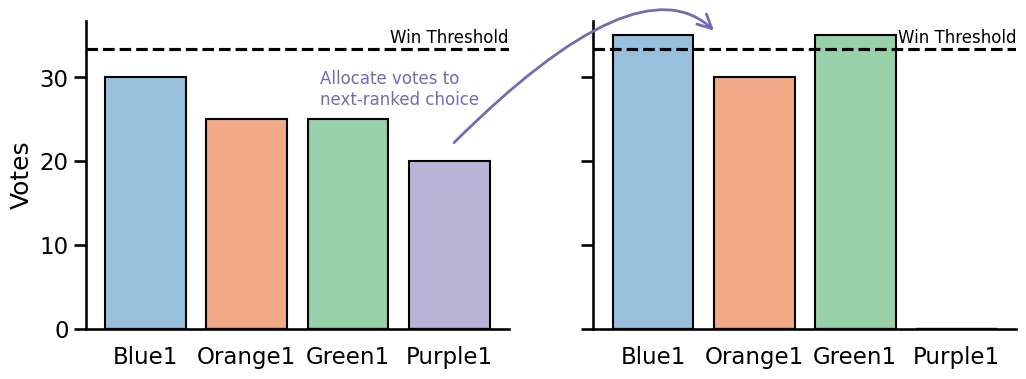

In [6]:
candidates0 = [("Blue1", 30), ("Orange1", 25), ("Green1", 25), ("Purple1", 20)]
lines0 = [(33.33, threshold_text),]
candidates1 = [("Blue1", 35), ("Orange1", 30), ("Green1", 35), ("Purple1", 0)]
lines1 = [(33.33, threshold_text),]
posA, posB = (0.43, 0.57), (0.65, 0.85)
txt_pos = (0.32, 0.67)
make_plot(candidates0, lines0, candidates1, lines1, posA=posA, posB=posB, angleA=45, 
          color="Purple", txt_pos=txt_pos, arrow_text="Allocate votes to\nnext-ranked choice")

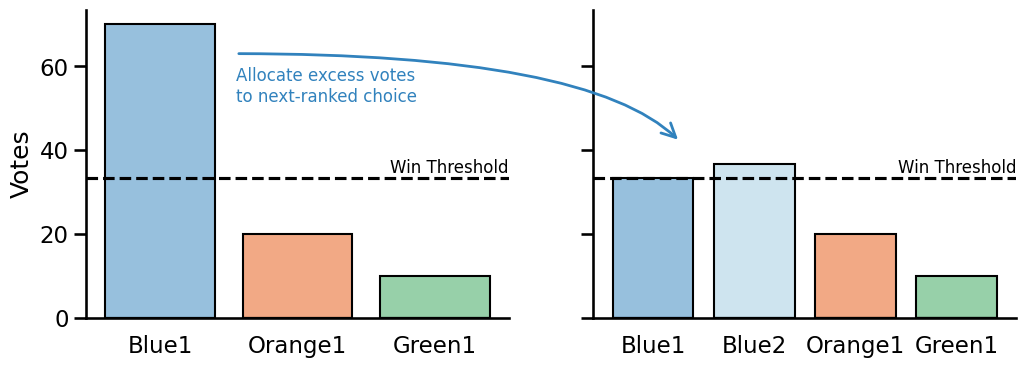

In [7]:
candidates0 = [("Blue1", 70), ("Orange1", 20), ("Green1", 10)]
lines0 = [(33.33, threshold_text)]
candidates1 = [("Blue1", 33.33), ("Blue2", 70-33.33), ("Orange1", 20), ("Green1", 10)]
lines1 = [(33.33, threshold_text)]
posA, posB = (0.25, 0.77), (0.62, 0.55)
txt_pos = (0.25, 0.65)
make_plot(candidates0, lines0, candidates1, lines1, posA=posA, posB=posB, txt_pos=txt_pos)

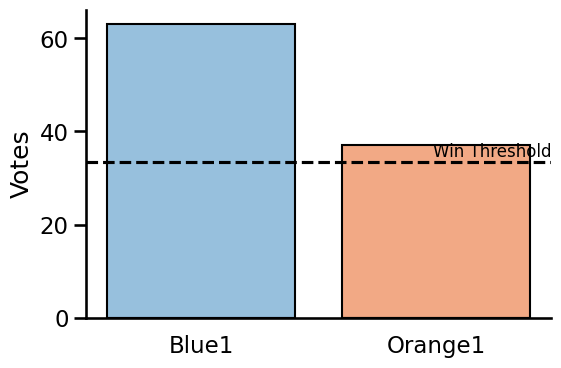

In [8]:
candidates = [("Blue1", 63), ("Orange1", 37)]
lines = [(33.33, threshold_text)]
make_plot(candidates, lines)

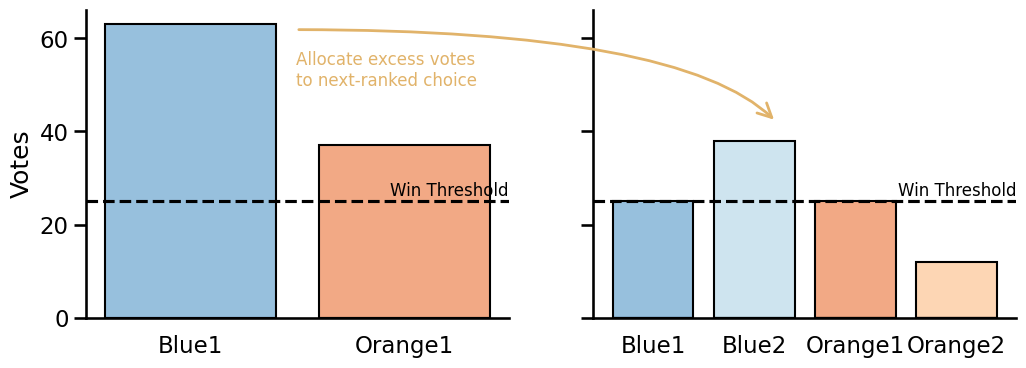

In [9]:
candidates0 = [("Blue1", 63), ("Orange1", 37)]
lines0 = [(25, threshold_text)]

candidates1 = [("Blue1", 25), ("Blue2", 38), ("Orange1", 25), ("Orange2", 12)]
lines1 = [(25, threshold_text)]

posA, posB = (0.3, 0.83), (0.7, 0.6)
txt_pos = (0.3, 0.69)
make_plot(candidates0, lines0, candidates1, lines1, posA=posA, posB=posB, txt_pos=txt_pos, color="Beige")